In [ ]:
from google.colab import files
files.upload()

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:12<00:00, 173MB/s]
100% 1.06G/1.06G [00:12<00:00, 89.8MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Kaggle/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/Kaggle')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/content/drive/MyDrive/Kaggle/dogs_vs_cats/train',
    batch_size = 32,
    image_size = (256,256),
    labels = 'inferred',
    label_mode = 'int'
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r"/content/drive/MyDrive/Kaggle/dogs_vs_cats/test",
    batch_size = 32,
    image_size = (256,256),
    labels = "inferred",
    label_mode = "int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalizing

def process(image,label):
  tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
model = Sequential()

# 1st Convulation layer
model.add(Conv2D(32, kernel_size = (3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides =2, padding="valid"))

# 2nd convulation
model.add(Conv2D(64,kernel_size = (3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides =2, padding="valid"))

# 3rd convultion
model.add(Conv2D(128,kernel_size = (3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides =2, padding="valid"))

#Convert data into 1-d array
model.add(Flatten())

# adding first hidden layer with 128 neurons and relu activation
model.add(Dense(128,activation='relu'))
# addin second hidden layer with 68 neurons and relu activation
model.add(Dense(64,activation='relu'))

# 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics =['accuracy'])

In [11]:
model.fit(train_ds,batch_size = 62,epochs=5,validation_data = validation_ds)

Epoch 1/5
625/625 [==============================] - 104s 135ms/step - loss: 2.0413 - accuracy: 0.5593 - val_loss: 0.6677 - val_accuracy: 0.5798
Epoch 2/5
625/625 [==============================] - 96s 152ms/step - loss: 0.6451 - accuracy: 0.6255 - val_loss: 0.7039 - val_accuracy: 0.6148
Epoch 3/5
625/625 [==============================] - 91s 144ms/step - loss: 0.6232 - accuracy: 0.6493 - val_loss: 0.7296 - val_accuracy: 0.6158
Epoch 4/5
625/625 [==============================] - 82s 130ms/step - loss: 0.5750 - accuracy: 0.6812 - val_loss: 0.7783 - val_accuracy: 0.5860
Epoch 5/5
625/625 [==============================] - 86s 137ms/step - loss: 0.4505 - accuracy: 0.7715 - val_loss: 0.9925 - val_accuracy: 0.5988


In [12]:
model.save("/content/drive/MyDrive/Kaggle/dog_cat.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
import cv2
import matplotlib.pyplot as plt


In [14]:
cat_img = cv2.imread("/content/drive/MyDrive/Kaggle/dogs_vs_cats/train/cats/cat.3.jpg")
cat_img.shape


(414, 500, 3)

In [15]:
dog_img = cv2.imread("/content/drive/MyDrive/Kaggle/dogs_vs_cats/train/dogs/dog.1.jpg")
dog_img.shape

(499, 327, 3)

resizing Image (256,256)



In [16]:
cat_img_resized = cv2.resize(cat_img,(256,256))
dog_img_resized = cv2.resize(dog_img,(256,256))

In [17]:
cat_img_resized = cat_img_resized.reshape(1,256,256,3)
dog_img_resized = dog_img_resized.reshape(1,256,256,3)

In [18]:
cat_img_resized.shape

(1, 256, 256, 3)

In [19]:
model.predict(cat_img_resized)

1/1 [==============================] - 0s 297ms/step


array([[0.9538834]], dtype=float32)

In [20]:
model.predict(dog_img_resized)

1/1 [==============================] - 0s 27ms/step


array([[0.98756105]], dtype=float32)

In [21]:
dog1 = cv2.imread("/content/drive/MyDrive/Kaggle/dog.jpg")
dog1_resized = cv2.resize(dog1,(256,256))

dog1_r = dog1_resized.reshape(1,256,256,3)
dog1_r.shape

(1, 256, 256, 3)

In [22]:
model.predict(dog1_r)

1/1 [==============================] - 0s 30ms/step


array([[0.9988242]], dtype=float32)

# If model is overfitting, how do we overcome it?

`->`

`1. Hyperparameter Tuning`

`2. Data Augmentation`

`3. Regularization`

`4. Dropout`


In [23]:
# Data Augmentation


from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [24]:
myimg = image.load_img(r"/content/drive/MyDrive/Kaggle/dogs_vs_cats/train/dogs/dog.1.jpg",target_size=(250,250))

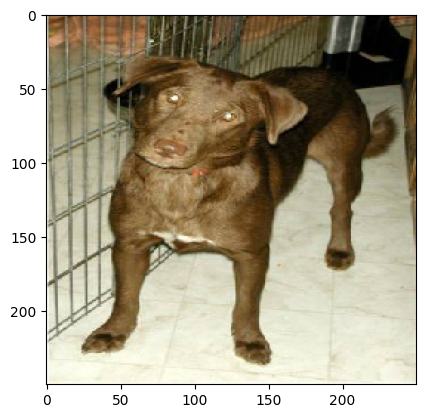

In [25]:
plt.imshow(myimg)

In [26]:
type(myimg)

PIL.Image.Image

convert to numpy array

In [27]:
img = image.img_to_array(myimg)

In [28]:
type(img)

numpy.ndarray

In [29]:

datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range=0.3,
    zoom_range= 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)


In [30]:
# Number of images should also be included

input_img = img.reshape(1,250,250,3)
input_img.shape

(1, 250, 250, 3)

In [34]:
i = 0
for output in datagen.flow(input_img,save_to_dir=r"//content/drive/MyDrive/Kaggle/dogs_vs_cats/augmented_data"):
  i = i+1

  if i == 10:
    break

In [35]:
train_datagen = ImageDataGenerator(
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1./255,
)

In [36]:
train_generator =train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Kaggle/dogs_vs_cats/train",
    target_size=(150,150),
    batch_size = 15,
    class_mode = "binary"
)

Found 20000 images belonging to 2 classes.


In [37]:
test_datagen = ImageDataGenerator(
     rescale=1./255,
)

test_generator =test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Kaggle/dogs_vs_cats/test",
    target_size=(150,150),
    batch_size = 15,
    class_mode = "binary"
)

Found 5000 images belonging to 2 classes.


In [45]:
model = Sequential()

# 1st Convulation layer
model.add(Conv2D(24, kernel_size = (3,3),padding="valid",activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides =2, padding="valid"))

# 2nd convulation
model.add(Conv2D(26,kernel_size = (3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides =2, padding="valid"))

# 3rd convultion
model.add(Conv2D(48,kernel_size = (3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides =2, padding="valid"))

#Convert data into 1-d array
model.add(Flatten())

# adding first hidden layer with 128 neurons and relu activation
model.add(Dense(64,activation='relu'))
# addin second hidden layer with 68 neurons and relu activation
model.add(Dense(32,activation='relu'))

# 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 24)      672       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 26)        5642      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 26)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 48)        11280     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 48)       

In [47]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics =['accuracy'])


In [49]:
model.fit_generator(train_generator,epochs=3,validation_data = test_generator)

<ipython-input-49-ddd1cec68a86>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,epochs=3,validation_data = test_generator)


Epoch 1/3
1334/1334 [==============================] - 200s 148ms/step - loss: 0.6821 - accuracy: 0.5563 - val_loss: 0.6620 - val_accuracy: 0.5846
Epoch 2/3
1334/1334 [==============================] - 197s 148ms/step - loss: 0.6071 - accuracy: 0.6643 - val_loss: 0.5516 - val_accuracy: 0.7310
Epoch 3/3
1334/1334 [==============================] - 194s 145ms/step - loss: 0.5228 - accuracy: 0.7354 - val_loss: 0.4576 - val_accuracy: 0.7836


In [50]:
model.save("/content/drive/MyDrive/Kaggle/dogs_vs_cats/dog_cat_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
